# Library Imports

In [1]:
import os
import skimage 
import numpy as np
import matplotlib.pyplot as plt
from pygcode import *
from skimage import measure
from skimage import io
from skimage import data
from skimage.color import rgb2gray

# Import PNG file

In [2]:
def import_image(path):
    file = os.path.join(path)
    img = io.imread(file)
    io.imshow(img) 
    io.show() 
    return img

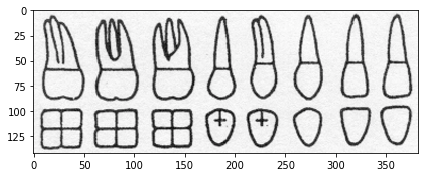

In [3]:
#image = import_image("Images/teeth.png")

# Grayscale Image

In [4]:
def img_to_gray(original):
    grayscale = rgb2gray(original)
    fig, axes = plt.subplots(1, 1, figsize=(4, 4))

    axes.imshow(grayscale, cmap=plt.cm.gray)
    axes.set_title("Grayscale")

    fig.tight_layout()
    plt.show()
    return grayscale

In [5]:
#gray_img = img_to_gray(image)

# Find Contours

In [6]:
def find_contours(image, accuracy):
    img = np.flip(image)
    
    # Find contours at a constant value defined by parameter accuracy
    contours = measure.find_contours(img, accuracy)
    
    # Display the image and plot all contours found
    fig, ax = plt.subplots()

    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1)

    ax.axis('image')
    plt.show()
    return contours

In [7]:
#contours = find_contours(gray_img, .9)
#len(contours)

# Define GCODE

In [8]:
def get_GCode(contours):
    i = 0
    all_instructions = []
    to_coords = lambda coords: {'X': coords[0], 'Y': coords[1]}
    for contour in contours:
        for coords in contour:
            if(i == 0):
                gcode = GCodeRapidMove(**to_coords(coords))
                print("%s" % gcode)
                i=1
            else:
                gcode = GCodeLinearMove(**to_coords(coords))
                print("%s" % gcode)
            all_instructions.append(gcode)
        i=0
        print("-" * 40)
    return all_instructions

In [9]:
#gcodes = get_GCode(contours)

# Output GCODE to file

In [10]:
def output_gcode(all_instructions, filename):
    File_object = open(filename,"w")
    for gcode in all_instructions:
        print(gcode)
        File_object.write(str(gcode) + " ;\n")
    File_object.close()

In [11]:
#output_gcode(gcodes, "output.gcode")